<a href="https://colab.research.google.com/github/Asleik/Asleik/blob/main/Imers%C3%A3o_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=green> 1. Importando os Dados

>Os dados foram disponibilizados no [Github da Alura](https://github.com/alura-cursos/imersaodados3/). Clique em `dados` e em seguida `dados_experimentos.zip`. Clique, com o botão esquerdo em `View raw` e copie o link. É nesse link que está nosso `dataset`.
>
>Para usa-los, será necessário importar a biblioteca [Pandas](https://pandas.pydata.org/).
>
>Os dados estão organizados como [CSV](https://en.wikipedia.org/wiki/Comma-separated_values), mas está dentro de um arquivo `.zip`. O pandas tem um parametro para tratar isso.

In [118]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados_bkp = dados.copy()
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

### Metodos que podem ser úteis:


>*   head()
>*   tail()
>*   shape*

>> *shape não é um método, é um atributo

In [ ]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [ ]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


In [ ]:
dados.shape

(23814, 877)

# <font color=green> 2. Decifrando a Tabela



## Coluna id

> Essa coluna é **realmente** composta de valores únicos, logo, podemos supor que cada uma representa uma experimentação diferente.

In [ ]:
print(dados.id.size)  # tamanho da coluna id
print(dados.shape[0])  # shape retorna uma tupla (num_linhas, num_colunas)
dados.id.size == dados.shape[0]

23814
23814


True

## Coluna tratamento 

> É composta apenas de `com_droga` (92%) e `com_controle` (8%).
>
> De acordo com a especialista, todas as experimentações são realizadas em ambientes controlados, sendo a droga utilizada a única variável diferente. Ou seja, `com_controle` seria o **padrão para comparação** e `com_droga` a **experimentação** propriamente dita.

> <font color=red> Pergunta: Pq a essa coluna tem os valores tão desbalanceados?
>
> Resposta: Na teoria, para cada **CONJUNTO DE COMBINAÇÕES** de `dose` e `tempo` de exposição, de **UMA DETERMINADA** `droga`, você só precisa de uma amostra de controle.


> [Documentação Pandas - value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)
>
>> normalize: Retorna a frequência de objetos únicos


In [ ]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
dados.tratamento.unique()

array(['com_droga', 'com_controle'], dtype=object)

In [ ]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
dados.tratamento.value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [ ]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Text(0.5, 1.0, 'Quantidade de Tratamentos no DataSet')

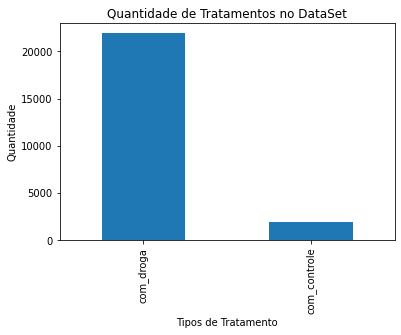

In [100]:
grafico_tratamento = dados.tratamento.value_counts().plot.bar()
grafico_tratamento.set_xlabel('Tipos de Tratamento')
grafico_tratamento.set_ylabel('Quantidade')
grafico_tratamento.set_title("Quantidade de Tratamentos no DataSet")

## Coluna tempo

> Os valores na coluna tempo são `24`(32%), `48`(35%), `72`(33%)
>
> De acordo com a especialista, eles representam o tempo que a amostra ficou exposta à droga.

In [37]:
dados.tempo.value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [38]:
dados.tempo.value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

Text(0.5, 1.0, 'Quantidade de Tempo de Exposição no DataSet')

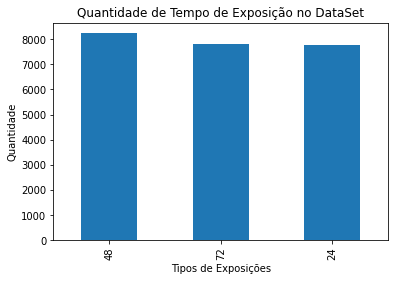

In [108]:
grafico_tempo = dados.tempo.value_counts().plot.bar()
grafico_tempo.set_xlabel('Tipos de Exposições')
grafico_tempo.set_ylabel('Quantidade')
grafico_tempo.set_title("Quantidade de Tempo de Exposição no DataSet")

> <font color=red> Pergunta: Como faço para ordenar esse gráfico pelo eixo x? 
>
> uptade1) Achei o metodo [DataFrame.sort_values()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html), mas não consegui desenrolar.

## Coluna dose

> Os valores na coluna dose são `D1`(51%) e  `D2`(49%).
>
>Não dá pra inferir mais nada nessa tabela. Provavelmente, D2 > D1, mas não é certeza.

In [41]:
dados.dose.value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [42]:
dados.dose.value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

Text(0.5, 1.0, 'Quantidade de Doses no DataSet')

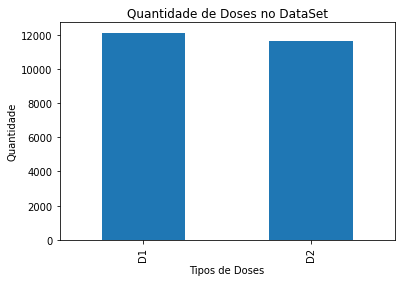

In [101]:
grafico_dose = dados.dose.value_counts().plot.bar()
grafico_dose.set_xlabel('Tipos de Doses')
grafico_dose.set_ylabel('Quantidade')
grafico_dose.set_title("Quantidade de Doses no DataSet")

## Coluna droga

> Existem 3289 diferentes drogas testadas.

In [48]:
dados.droga.unique().size

3289

## Colunas g-N

> De acordo com a especialista, g é a abreviação de gene e o valor é a mudança da expressão genética desse.
>
> Aparentemente os dados foram normalizados [normalizados](https://medium.com/data-hackers/normalizar-ou-padronizar-as-vari%C3%A1veis-3b619876ccc9). 

> [Query](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) pode ajudar a fazer as pesquisas.
>
> Será necessário também renomear as colunas para facilizar a escrita das queries

In [110]:
dados['g-0'].max()

10.0

In [113]:
dados['g-0'].min()

-5.513

> <font color=red> Pergunta: Consegui pegar o valor máximo e mínimo de uma coluna, mas e de um conjunto de colunas? 
>
> uptade1) Provavelmente o query pode ajudar.

In [ ]:
# só para não ter que retornar ao inicio e rodar dados novamente
dados = dados_bkp.copy()

In [131]:
dados.query('`g-0`>9').head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
119,id_01534c4ee,com_droga,72,D2,87d714366,10.000,-1.2200,1.5150,-2.1910,4.353,-0.9594,2.5600,-3.312,-9.507,-3.393,-4.160,-2.9320,0.000,2.265,-6.2560,0.1147,-4.209,-3.5580,3.2920,0.1551,-3.720,0.1069,1.3000,1.971,-9.935,-1.834,-1.0720,0.2092,-1.989,-4.039,-6.047,8.404,3.1040,-3.3390,-2.8780,...,-9.978,-9.978,-9.978,-9.978,-8.823,-9.978,-9.513,-9.832,-9.978,-6.568,-9.978,-8.664,-9.978,-9.978,-4.073,-10.000,-5.163,-7.797,-10.000,-8.297,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.019,-8.688,-9.658,-9.308,-10.000,-10.000,-7.703,-10.000,-10.000,-9.054,-10.000,-8.771,-9.694,-5.548
1097,id_0b1fe2844,com_droga,72,D2,87d714366,9.970,0.4643,7.3530,-1.9560,2.773,-1.9440,1.0850,-2.108,-9.111,-3.947,-4.461,2.9650,1.815,-2.673,-5.0280,0.4843,-2.566,-7.3640,-0.1765,0.1174,-5.712,0.2190,0.3878,2.433,-6.196,-2.677,-1.4060,-0.5371,-5.421,-4.524,-6.982,10.000,1.9390,0.7206,-1.8260,...,-9.927,-9.927,-9.927,-9.927,-8.943,-9.927,-9.833,-9.854,-9.927,-7.231,-9.927,-9.248,-9.927,-9.927,-4.561,-10.000,-4.958,-8.362,-10.000,-8.221,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.875,-9.033,-9.182,-10.000,-10.000,-10.000,-7.970,-9.657,-10.000,-8.842,-10.000,-8.410,-8.153,-8.071
2428,id_19d6af4bd,com_droga,72,D2,87d714366,10.000,1.7490,3.0880,-5.3250,1.208,1.9830,0.7938,-2.732,-4.591,-2.760,1.771,0.4590,1.959,-1.345,-0.3854,0.0688,-5.721,-0.6745,2.6800,0.0000,-4.747,-0.1926,-1.0890,1.046,-1.270,4.638,-0.8358,1.5140,-2.992,-8.098,-5.981,10.000,-0.8698,-2.4110,-0.5807,...,-9.989,-9.961,-9.989,-9.989,-9.291,-9.989,-9.989,-9.969,-9.989,-7.556,-9.989,-9.989,-9.989,-9.989,-6.180,-10.000,-8.401,-9.472,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.025,-10.000,-9.737,-9.726,-10.000,-10.000,-8.951,-10.000,-10.000,-8.880,-10.000,-9.220,-9.567,-6.152
2483,id_1a76d8de8,com_droga,48,D1,87d714366,9.246,-0.8621,-0.0984,2.5070,1.552,-0.9195,2.2700,-3.570,-4.651,-2.725,-5.517,0.3689,-3.744,8.833,-6.0150,-1.3110,-4.285,-3.2630,0.3453,-1.5490,-4.448,-0.5042,-0.2657,-0.098,-3.452,-2.409,-4.4420,1.7420,-2.949,-1.979,-2.996,5.286,-0.9883,-3.8550,-0.9677,...,-10.000,-6.516,-10.000,-10.000,-6.559,-10.000,-9.642,-10.000,-10.000,-7.113,-10.000,-8.241,-10.000,-10.000,-3.745,-9.889,-5.754,-9.718,-9.889,-7.592,-9.889,-8.604,-9.889,-9.889,-9.889,-9.715,-8.517,-9.693,-9.467,-9.889,-9.465,-9.889,-8.129,-9.889,-9.889,-5.794,-9.889,-7.942,-7.743,-3.505
4051,id_2b6578ba8,com_droga,72,D2,87d714366,10.000,2.3940,1.8690,-0.1674,6.278,-2.0770,-0.1433,-1.627,-10.000,-2.879,-5.610,0.1647,-1.781,5.913,-8.4610,0.4277,-5.106,-2.8000,1.0030,-0.0847,-4.202,0.9696,1.0240,1.132,-8.980,-3.370,-4.2050,3.2700,-4.550,-5.814,-9.336,10.000,0.2489,-2.9180,-3.1810,...,-9.991,-9.991,-9.991,-9.991,-9.991,-9.991,-9.991,-9.991,-9.991,-8.560,-9.991,-9.991,-9.991,-9.991,-5.918,-10.000,-6.470,-8.071,-10.000,-9.901,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-9.729,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-9.541,-10.000,-9.971,-10.000,-9.054


In [136]:
# Renomeando as colunas
dados.columns.str.replace('-','')

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2', 'g3',
       'g4',
       ...
       'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99'],
      dtype='object', length=877)


In [138]:
dados.columns = dados.columns.str.replace('-','')

In [140]:
dados.query('g0 > 9').head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
119,id_01534c4ee,com_droga,72,D2,87d714366,10.000,-1.2200,1.5150,-2.1910,4.353,-0.9594,2.5600,-3.312,-9.507,-3.393,-4.160,-2.9320,0.000,2.265,-6.2560,0.1147,-4.209,-3.5580,3.2920,0.1551,-3.720,0.1069,1.3000,1.971,-9.935,-1.834,-1.0720,0.2092,-1.989,-4.039,-6.047,8.404,3.1040,-3.3390,-2.8780,...,-9.978,-9.978,-9.978,-9.978,-8.823,-9.978,-9.513,-9.832,-9.978,-6.568,-9.978,-8.664,-9.978,-9.978,-4.073,-10.000,-5.163,-7.797,-10.000,-8.297,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.019,-8.688,-9.658,-9.308,-10.000,-10.000,-7.703,-10.000,-10.000,-9.054,-10.000,-8.771,-9.694,-5.548
1097,id_0b1fe2844,com_droga,72,D2,87d714366,9.970,0.4643,7.3530,-1.9560,2.773,-1.9440,1.0850,-2.108,-9.111,-3.947,-4.461,2.9650,1.815,-2.673,-5.0280,0.4843,-2.566,-7.3640,-0.1765,0.1174,-5.712,0.2190,0.3878,2.433,-6.196,-2.677,-1.4060,-0.5371,-5.421,-4.524,-6.982,10.000,1.9390,0.7206,-1.8260,...,-9.927,-9.927,-9.927,-9.927,-8.943,-9.927,-9.833,-9.854,-9.927,-7.231,-9.927,-9.248,-9.927,-9.927,-4.561,-10.000,-4.958,-8.362,-10.000,-8.221,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.875,-9.033,-9.182,-10.000,-10.000,-10.000,-7.970,-9.657,-10.000,-8.842,-10.000,-8.410,-8.153,-8.071
2428,id_19d6af4bd,com_droga,72,D2,87d714366,10.000,1.7490,3.0880,-5.3250,1.208,1.9830,0.7938,-2.732,-4.591,-2.760,1.771,0.4590,1.959,-1.345,-0.3854,0.0688,-5.721,-0.6745,2.6800,0.0000,-4.747,-0.1926,-1.0890,1.046,-1.270,4.638,-0.8358,1.5140,-2.992,-8.098,-5.981,10.000,-0.8698,-2.4110,-0.5807,...,-9.989,-9.961,-9.989,-9.989,-9.291,-9.989,-9.989,-9.969,-9.989,-7.556,-9.989,-9.989,-9.989,-9.989,-6.180,-10.000,-8.401,-9.472,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-8.025,-10.000,-9.737,-9.726,-10.000,-10.000,-8.951,-10.000,-10.000,-8.880,-10.000,-9.220,-9.567,-6.152
2483,id_1a76d8de8,com_droga,48,D1,87d714366,9.246,-0.8621,-0.0984,2.5070,1.552,-0.9195,2.2700,-3.570,-4.651,-2.725,-5.517,0.3689,-3.744,8.833,-6.0150,-1.3110,-4.285,-3.2630,0.3453,-1.5490,-4.448,-0.5042,-0.2657,-0.098,-3.452,-2.409,-4.4420,1.7420,-2.949,-1.979,-2.996,5.286,-0.9883,-3.8550,-0.9677,...,-10.000,-6.516,-10.000,-10.000,-6.559,-10.000,-9.642,-10.000,-10.000,-7.113,-10.000,-8.241,-10.000,-10.000,-3.745,-9.889,-5.754,-9.718,-9.889,-7.592,-9.889,-8.604,-9.889,-9.889,-9.889,-9.715,-8.517,-9.693,-9.467,-9.889,-9.465,-9.889,-8.129,-9.889,-9.889,-5.794,-9.889,-7.942,-7.743,-3.505
4051,id_2b6578ba8,com_droga,72,D2,87d714366,10.000,2.3940,1.8690,-0.1674,6.278,-2.0770,-0.1433,-1.627,-10.000,-2.879,-5.610,0.1647,-1.781,5.913,-8.4610,0.4277,-5.106,-2.8000,1.0030,-0.0847,-4.202,0.9696,1.0240,1.132,-8.980,-3.370,-4.2050,3.2700,-4.550,-5.814,-9.336,10.000,0.2489,-2.9180,-3.1810,...,-9.991,-9.991,-9.991,-9.991,-9.991,-9.991,-9.991,-9.991,-9.991,-8.560,-9.991,-9.991,-9.991,-9.991,-5.918,-10.000,-6.470,-8.071,-10.000,-9.901,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-9.729,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-10.000,-9.541,-10.000,-9.971,-10.000,-9.054
